In [79]:
import pandas as pd
pd.options.mode.chained_assignment = None
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
data_list = []
with open('data_harvest_full.json','r') as sample:
    for line in sample:
        data_list.append(json.loads(line.strip()))
raw_df = pd.DataFrame.from_dict(data_list)
# raw_df.head()

In [81]:
df = raw_df.copy()
df.replace('N/A',None,inplace=True)
df.drop(columns=['status','version'],inplace=True)
# df.info()

In [82]:
df.head()

,url,location,price,year,mileage,fuel_type,emission,fuel_usage,transmission,door_nb,technical_power,seat_nb,actual_power,body_colour,body_type
0,https://www.paruvendu.fr/a/voiture-occasion/da...,dissay (86130),prix 17 600 €,année février 2019 le comparateur d'assurance ...,kilométrage 18 300 km,energie essence,None,None,transmission manuelle,nb de portes 4 portes avec hayon,puissance fiscale 7 cv,nombre de places 5 places,130,blanc,4x4
1,https://www.paruvendu.fr/a/voiture-occasion/mi...,59240 dunkerque,prix 24 990 €,année mai 2018 le comparateur d'assurance pour...,kilométrage 47 500 km,energie essence,emissions de co2 119 g/km,None,transmission automatique,nb de portes 2 portes avec hayon,puissance fiscale 10 cv,nombre de places 4 places,192,rouge foncé,berline
2,https://www.paruvendu.fr/a/voiture-occasion/ni...,53000 laval,prix 8 490 €,année octobre 2013 le comparateur d'assurance ...,kilométrage 166 400 km,energie diesel,emissions de co2 129 g/km,None,transmission manuelle,nb de portes 4 portes avec hayon,puissance fiscale 6 cv,nombre de places 5 places,110,gris,break
3,https://www.paruvendu.fr/a/voiture-occasion/ni...,belley (01300),prix 16 900 €,année octobre 2016 le comparateur d'assurance ...,kilométrage 61 500 km,energie diesel,emissions de co2 128 g/km,consommation mixte 4.9 litres / 100 km,transmission automatique,nb de portes 4 portes avec hayon,puissance fiscale 7 cv,nombre de places 5 places,130,gris foncé,4x4
4,https://www.paruvendu.fr/a/voiture-occasion/mi...,30200 bagnols-sur-cèze,prix 17 900 €,année février 2018 le comparateur d'assurance ...,kilométrage 58 529 km,energie diesel,emissions de co2 99 g/km,None,transmission manuelle,nb de portes 4 portes avec hayon,puissance fiscale 5 cv,nombre de places 5 places,95,gris,berline


In [83]:
loop_length = len(df)
for i in range(loop_length):
    line = df.iloc[i]
    location = line['location']
    location_list = location.replace('(','').replace(')','').split()
    value = ''
    for word in location_list:
        if word.isnumeric() :
            value = word
            break
    line['location'] = value
# df['location'] = df['location'].str.replace(r'\D','')
# df.head()

<AxesSubplot:>

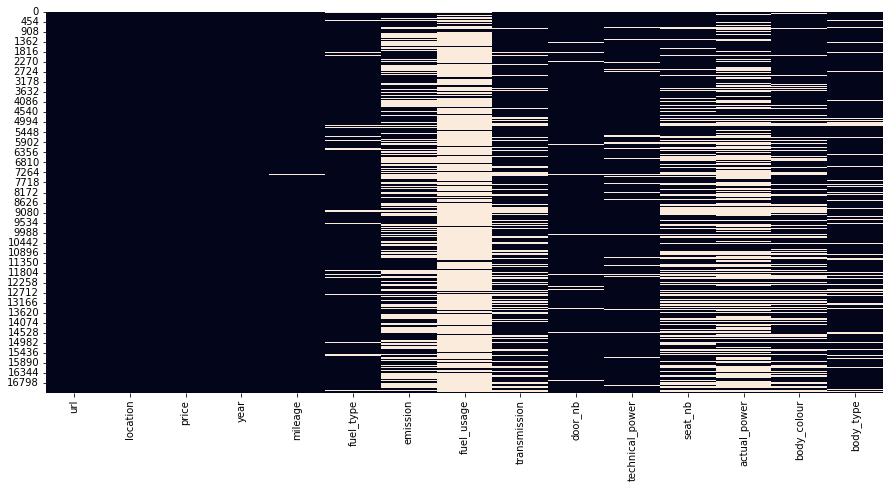

In [84]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isna(), cbar=False)

In [85]:
loop_length = len(df)
for i in range(loop_length):
    line = df.iloc[i]
    year = line['year']
    if year is not None:
        year_list = year.split()
        value = None
        for word in year_list:
            if word.isnumeric() :
                value = word
                break
        line['year'] = value
# df.head()

In [86]:
loop_length = len(df)
for i in range(loop_length):
    line = df.iloc[i]
    emission = line['emission']
    if emission is not None:
        emission_list = emission.split()
        value = None
        for word in emission_list:
            if word.isnumeric() :
                value = word
                break
        line['emission'] = value
# df.head()

In [87]:
loop_length = len(df)
for i in range(loop_length):
    line = df.iloc[i]
    mileage = line['mileage']
    if mileage is not None:
        mileage_list = mileage.split()
        value = ''
        for word in mileage_list:
            if word.isnumeric() :
                value += word
        line['mileage'] = value
# df.head()

In [88]:
loop_length = len(df)
for i in range(loop_length):
    line = df.iloc[i]
    price = line['price']
    if price is not None:
        price_list = price.split()
        value = ''
        for word in price_list:
            if word.isnumeric() :
                value += word
        line['price'] = value
# df.head()

In [89]:
loop_length = len(df)
for i in range(loop_length):
    line = df.iloc[i]
    technical_power = line['technical_power']
    if technical_power is not None:
        technical_power_list = technical_power.split()
        value = ''
        for word in technical_power_list:
            if word.isnumeric() :
                value = word
        line['technical_power'] = value
# df.head()

In [90]:
loop_length = len(df)
for i in range(loop_length):
    line = df.iloc[i]
    transmission = line['transmission']
    if transmission is not None:
        line['transmission'] = transmission.replace('transmission','').strip()
    fuel_type = line['fuel_type']
    if fuel_type is not None:
        line['fuel_type'] = fuel_type.replace('energie','').strip()
# df.head()

In [91]:
loop_length = len(df)
for i in range(loop_length):
    line = df.iloc[i]
    door_nb = line['door_nb']
    if door_nb is not None:
        door_nb_list = door_nb.split()
        value = ''
        for word in door_nb_list:
            if word.isnumeric() :
                value = word
        line['door_nb'] = value
# df.head()

In [92]:
loop_length = len(df)
for i in range(loop_length):
    line = df.iloc[i]
    seat_nb = line['seat_nb']
    if seat_nb is not None:
        seat_nb_list = seat_nb.split()
        value = ''
        for word in seat_nb_list:
            if word.isnumeric() :
                value = word
        line['seat_nb'] = value
# df.head()

In [93]:
loop_length = len(df)
for i in range(loop_length):
    line = df.iloc[i]
    url = line['url']
    url_list = url.split('/')
    line['url'] = '' + url_list[5] + ';' + url_list[6]
df[['marque','model']] = df['url'].str.split(";",expand=True)
df.drop(columns=['url'], inplace=True)
# df.head()

In [94]:
del df['body_colour']
# df.head()

In [95]:
df =  df[df['model'].map(df['model'].value_counts()) > 1]
# df['model'].value_counts()

In [96]:
df['fuel_type'].value_counts()

diesel        7677
essence       7471
hybride        614
autres         245
electrique     130
gpl ou gnl      18
Name: fuel_type, dtype: int64

In [97]:
df = df[df['fuel_type'] != "hybride"] 
df =  df[df['fuel_type'] != "autres"] 
df = df[df['fuel_type'] != "electrique"] 
df = df[df['fuel_type'] != "gpl ou gnl"]
df['fuel_type'].value_counts()

diesel     7677
essence    7471
Name: fuel_type, dtype: int64

In [98]:
df['transmission'].value_counts()

manuelle            6546
automatique         4620
semi automatique     544
autres                10
Name: transmission, dtype: int64

In [99]:
df = df[df['transmission'] != "autres"]
df = df[df['transmission'] != "semi automatique"]
df['transmission'].value_counts()

manuelle       6546
automatique    4620
Name: transmission, dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15662 entries, 0 to 17230
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   location         15662 non-null  object
 1   price            15652 non-null  object
 2   year             15645 non-null  object
 3   mileage          15652 non-null  object
 4   fuel_type        14597 non-null  object
 5   emission         5908 non-null   object
 6   fuel_usage       2033 non-null   object
 7   transmission     11166 non-null  object
 8   door_nb          15190 non-null  object
 9   technical_power  14878 non-null  object
 10  seat_nb          10314 non-null  object
 11  actual_power     7640 non-null   object
 12  body_type        13298 non-null  object
 13  marque           15662 non-null  object
 14  model            15662 non-null  object
dtypes: object(15)
memory usage: 1.9+ MB


In [101]:
df.replace('',None,inplace=True)

In [102]:
df.to_csv('dataset.csv',index=None)

In [103]:
data = pd.read_csv('dataset.csv')

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15662 entries, 0 to 15661
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         15617 non-null  float64
 1   price            15652 non-null  float64
 2   year             15645 non-null  float64
 3   mileage          15652 non-null  float64
 4   fuel_type        14597 non-null  object 
 5   emission         5908 non-null   float64
 6   fuel_usage       2033 non-null   object 
 7   transmission     11166 non-null  object 
 8   door_nb          15190 non-null  float64
 9   technical_power  14878 non-null  float64
 10  seat_nb          10314 non-null  float64
 11  actual_power     7640 non-null   float64
 12  body_type        13298 non-null  object 
 13  marque           15662 non-null  object 
 14  model            15662 non-null  object 
dtypes: float64(9), object(6)
memory usage: 1.8+ MB


In [105]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=False)

fuel_usage         0.870195
emission           0.622781
actual_power       0.512195
seat_nb            0.341463
transmission       0.287064
body_type          0.150939
fuel_type          0.067999
technical_power    0.050057
door_nb            0.030137
location           0.002873
year               0.001085
price              0.000638
mileage            0.000638
marque             0.000000
model              0.000000
dtype: float64

In [106]:
data = data[data.columns[data.isna().sum()/data.shape[0] <0.75]]

In [107]:
df_agg = data.groupby('model', as_index=False).median()

In [108]:
loop_length = len(data)
data.fillna(-1.0, inplace=True)

for i in (range(loop_length)):
    line = data.iloc[i].copy()
    line_agg = df_agg.loc[df_agg['model'] == line['model']]
    if line['emission'] == -1.0:
        n_emission = line_agg['emission'].item()
        line['emission'] = n_emission
    if line['door_nb'] == -1.0:
        n_door_nb = line_agg['door_nb'].item()
        line['door_nb'] = n_door_nb
    if line['seat_nb'] == -1.0:
        n_seat_nb = line_agg['seat_nb'].item()
        line['seat_nb'] = n_seat_nb
    if line['technical_power'] == -1.0:
        n_technical_power = line_agg['technical_power'].item()
        line['technical_power'] = n_technical_power
    if line['actual_power'] == -1.0:
        n_actual_power = line_agg['actual_power'].item()
        line['actual_power'] = n_actual_power
    data.iloc[i] = line

In [109]:
data.replace(-1,None,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15662 entries, 0 to 15661
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         15617 non-null  object 
 1   price            15652 non-null  object 
 2   year             15645 non-null  object 
 3   mileage          15652 non-null  object 
 4   fuel_type        14597 non-null  object 
 5   emission         15443 non-null  float64
 6   transmission     11166 non-null  object 
 7   door_nb          15545 non-null  float64
 8   technical_power  15660 non-null  float64
 9   seat_nb          15582 non-null  float64
 10  actual_power     15490 non-null  float64
 11  body_type        13298 non-null  object 
 12  marque           15662 non-null  object 
 13  model            15662 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.7+ MB


In [110]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=False)

transmission       0.287064
body_type          0.150939
fuel_type          0.067999
emission           0.013983
actual_power       0.010982
door_nb            0.007470
seat_nb            0.005108
location           0.002873
year               0.001085
price              0.000638
mileage            0.000638
technical_power    0.000128
marque             0.000000
model              0.000000
dtype: float64

In [114]:
data.fillna(-1,inplace=True)
transmission_list = data['transmission'].unique()
model_list = data['model'].unique()
print(transmission_list)

['manuelle' 'automatique' -1]


In [112]:
transmission_list = transmission_list[0:2]
print(transmission_list)

['manuelle' 'automatique']


In [113]:
dict_model_transmission = dict()
for model in model_list:
    dict_model_transmission[model] = dict()
    for transmission in transmission_list:
        dict_model_transmission[model][transmission] = 0

loop_length = len(data)
for i in range(loop_length):
    line = data.iloc[i].copy()
    model = line['model']
    transmission = line['transmission']
    if transmission != -1:
        dict_model_transmission[model][transmission] += 1

In [115]:
for key in dict_model_transmission.keys():
    dict_model_transmission[key] = max(dict_model_transmission[key],key=dict_model_transmission[key].get)

In [117]:
body_type_list_raw = data['body_type'].unique()
print(body_type_list_raw)

['4x4' 'berline' 'break' 'cabriolet' -1 'coupé' 'véhicule' 'monospace'
 'pick-up' 'fourgon' 'benne']


In [118]:
body_type_list = []
for i in range(len(body_type_list_raw)):
    value = body_type_list_raw[i]
    if value != -1:
        body_type_list.append(value)
print(body_type_list)

['4x4', 'berline', 'break', 'cabriolet', 'coupé', 'véhicule', 'monospace', 'pick-up', 'fourgon', 'benne']


In [119]:
dict_model_body_type = dict()
for model in model_list:
    dict_model_body_type[model] = dict()
    for body_type in body_type_list:
        dict_model_body_type[model][body_type] = 0

loop_length = len(data)
for i in range(loop_length):
    line = data.iloc[i].copy()
    model = line['model']
    body_type = line['body_type']
    if body_type != -1:
        dict_model_body_type[model][body_type] += 1

In [120]:
for key in dict_model_body_type.keys():
    dict_model_body_type[key] = max(dict_model_body_type[key],key=dict_model_body_type[key].get)

In [122]:
fuel_type_list_raw = data['fuel_type'].unique()
print(fuel_type_list_raw)

['essence' 'diesel' -1]


In [123]:
fuel_type_list = fuel_type_list_raw[0:2]
print(fuel_type_list)

['essence' 'diesel']


In [124]:
dict_model_fuel_type = dict()
for model in model_list:
    dict_model_fuel_type[model] = dict()
    for fuel_type in fuel_type_list:
        dict_model_fuel_type[model][fuel_type] = 0

loop_length = len(data)
for i in range(loop_length):
    line = data.iloc[i].copy()
    model = line['model']
    fuel_type = line['fuel_type']
    if fuel_type != -1:
        dict_model_fuel_type[model][fuel_type] += 1

In [125]:
for key in dict_model_fuel_type.keys():
    dict_model_fuel_type[key] = max(dict_model_fuel_type[key],key=dict_model_fuel_type[key].get)

In [127]:
loop_length = len(data)
for i in range(loop_length):
    line = data.iloc[i].copy()
    model = line['model']
    if line['transmission'] == -1:
        n_transmission = dict_model_transmission[model]
        line['transmission'] = n_transmission
    if line['body_type'] == -1:
        n_body_type = dict_model_body_type[model]
        line['body_type'] = n_body_type
    if line['fuel_type'] == -1:
        n_fuel_type = dict_model_fuel_type[model]
        line['fuel_type'] = n_fuel_type
    data.iloc[i] = line

In [128]:
data.replace(-1,None,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15662 entries, 0 to 15661
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   location         15617 non-null  object
 1   price            15652 non-null  object
 2   year             15645 non-null  object
 3   mileage          15652 non-null  object
 4   fuel_type        15662 non-null  object
 5   emission         15443 non-null  object
 6   transmission     15662 non-null  object
 7   door_nb          15545 non-null  object
 8   technical_power  15660 non-null  object
 9   seat_nb          15582 non-null  object
 10  actual_power     15490 non-null  object
 11  body_type        15662 non-null  object
 12  marque           15662 non-null  object
 13  model            15662 non-null  object
dtypes: object(14)
memory usage: 1.7+ MB


In [129]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=False)

emission           0.013983
actual_power       0.010982
door_nb            0.007470
seat_nb            0.005108
location           0.002873
year               0.001085
price              0.000638
mileage            0.000638
technical_power    0.000128
fuel_type          0.000000
transmission       0.000000
body_type          0.000000
marque             0.000000
model              0.000000
dtype: float64

In [130]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15291 entries, 0 to 15661
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   location         15291 non-null  object
 1   price            15291 non-null  object
 2   year             15291 non-null  object
 3   mileage          15291 non-null  object
 4   fuel_type        15291 non-null  object
 5   emission         15291 non-null  object
 6   transmission     15291 non-null  object
 7   door_nb          15291 non-null  object
 8   technical_power  15291 non-null  object
 9   seat_nb          15291 non-null  object
 10  actual_power     15291 non-null  object
 11  body_type        15291 non-null  object
 12  marque           15291 non-null  object
 13  model            15291 non-null  object
dtypes: object(14)
memory usage: 1.7+ MB


In [131]:
data.to_csv('clean_dataset.csv',index=None)